In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [3]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df = pd.read_csv('../datasets/repositories.csv')
df

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [18]:
filtered = df.loc[(df['stars']>=100) & (df['contributors']>1)]
filtered

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


In [45]:
(
    df
    [lambda d:d.stars >=100]
    [lambda d:d.contributors>1]
    .groupby(['language'])
    .agg({'repository' : 'count'})
    .sort_values('repository',ascending=False)
    .assign(proportion = lambda d:d.repository / d.repository.sum())
    
    
)

,repository,proportion
language,,
JavaScript,13062,0.197702
Python,11727,0.177496
TypeScript,6185,0.093614
Java,5720,0.086576
C++,5385,0.081506
Go,4842,0.073287
C,4092,0.061935
PHP,3915,0.059256
C#,3407,0.051567


In [19]:
repocount = filtered.groupby(['language']).count()['repository']
repocount

language
C               4092
C#              3407
C++             5385
Go              4842
Java            5720
JavaScript     13062
Kotlin          1038
Objective-C      631
PHP             3915
Python         11727
Ruby            2566
Shell           2160
Smalltalk         10
Swift           1329
TypeScript      6185
Name: repository, dtype: int64

In [36]:
count = repocount / repocount.sum()
count

language
C              0.061935
C#             0.051567
C++            0.081506
Go             0.073287
Java           0.086576
JavaScript     0.197702
Kotlin         0.015711
Objective-C    0.009551
PHP            0.059256
Python         0.177496
Ruby           0.038838
Shell          0.032693
Smalltalk      0.000151
Swift          0.020115
TypeScript     0.093614
Name: repository, dtype: float64

## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [21]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_w = pd.read_csv('../datasets/workflows.csv')
df_w

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/
    

In [22]:
df_w['events_lst'] = df_w['events'].str.split(',')
df_f = df_w.explode('events_lst')
df_f

,repository,filename,name,events,jobs,events_lst
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2,push
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2,pull_request
1,0101/pipetools,publish_docs.yml,Publish docs,push,1,push
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1,push
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1,pull_request
...,...,...,...,...,...,...
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4,push
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3,pull_request
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3,release
70277,zzzm/hostsx,main.yml,Deploy,"push, workflow_dispatch",1,push


In [66]:
(
    df_f
    .groupby(['events_lst'])
    .agg({'repository' : 'count' })
    .assign(proportion = lambda d:d.repository / d.repository.sum())
    .sort_values('proportion',ascending=False)
    .assign(proportion_cul = lambda d:d.proportion.cumsum())
    
    
)

,repository,proportion,proportion_cul
events_lst,,,
push,45727,0.376239,0.376239
pull_request,31542,0.259526,0.635765
pull_request,9662,0.079498,0.715264
schedule,6098,0.050174,0.765438
workflow_dispatch,5501,0.045262,0.810700
...,...,...,...
project_column,2,0.000016,0.999951
public,2,0.000016,0.999967
registry_package,2,0.000016,0.999984


In [31]:
repof = df_f.groupby(['events_lst']).count()['repository']
count_f = repof / repof.sum()
count_f_sorted = count_f.sort_values(ascending=False)
count_f_sorted

events_lst
push                  0.376239
 pull_request         0.259526
pull_request          0.079498
 schedule             0.050174
 workflow_dispatch    0.045262
                        ...   
 project_column       0.000016
 public               0.000016
 registry_package     0.000016
discussion_comment    0.000008
 types                0.000008
Name: repository, Length: 63, dtype: float64

In [24]:

100*(count_f_sorted.cumsum() / count_f_sorted.sum())

events_lst
push                   37.623933
 pull_request          63.576524
pull_request           71.526366
 schedule              76.543769
 workflow_dispatch     81.069962
                         ...    
 project_column        99.995063
 public                99.996709
 registry_package      99.998354
discussion_comment     99.999177
 types                100.000000
Name: repository, Length: 63, dtype: float64

## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [25]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_a = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_a

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [26]:
df_a['prime_cat'] = df_a['category'].apply(lambda arr: arr[0])
df_a

,actions,category,stars,open_issues,pull_requests,prime_cat
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [27]:
repoa = df_a.groupby(['prime_cat']).count()['actions']
count_a = repoa / repoa.sum()
count_a

prime_cat
ai-assisted               0.000329
api-management            0.017632
backup-utilities          0.002300
chat                      0.028036
code-quality              0.049392
code-review               0.083781
code-scanning-ready       0.000548
code-search               0.001095
community                 0.000110
container-ci              0.029351
continuous-integration    0.260103
dependency-management     0.042821
deployment                0.124630
desktop-tools             0.001971
game-ci                   0.002081
ides                      0.003286
learning                  0.008104
localization              0.006023
mobile                    0.007447
mobile-ci                 0.005038
monitoring                0.020918
open-source-management    0.004819
project-management        0.085752
publishing                0.051254
reporting                 0.008761
security                  0.065163
support                   0.017742
testing                   0.037564
time-track

In [28]:
five = repoa.nlargest()

d = five.to_dict()
d['other'] = repoa.sum()-five.sum()

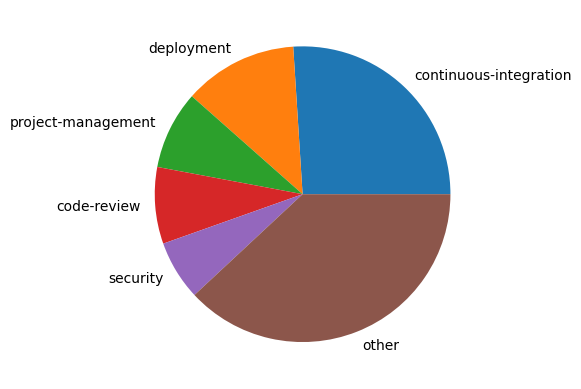

In [29]:
labels = list(d.keys())
sizes = list(d.values())

fig, ax = plt.subplots()
a = ax.pie(sizes, labels=labels)